In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Mar 15 17:33:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os

path = "/content/drive/MyDrive/Yolo_Detection"
os.makedirs(path, exist_ok=True)  # `exist_ok=True` prevents an error if the directory already exists
print(f"Created directory: {path}")



Created directory: /content/drive/MyDrive/Yolo_Detection


In [ ]:
#%cd /content/drive/MyDrive/
%cd /content/drive/MyDrive/Yolo_Detection

import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Yolo_Detection
/content/drive/MyDrive/Yolo_Detection


In [ ]:
!pip install ultralytics==8.0


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.0 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.9/112.6 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qJjHTaEJAHXt4vqSxvwj")
project = rf.workspace("r-thanuja-reddy-yt93m").project("persondetection-bgsqe")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PersonDetection-1 in yolov8:: 100%|██████████| 844/844 [00:06<00:00, 129.40it/s]


In [ ]:
# Read and display the content of data.yaml
with open("/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/data.yaml", "r") as f:
    content = f.read()

    print(content)


names:
- boots
- gloves
- hard-hat
- mask
- person
- ppe-suit
- vest
nc: 7
roboflow:
  license: CC BY 4.0
  project: persondetection-bgsqe
  url: https://universe.roboflow.com/r-thanuja-reddy-yt93m/persondetection-bgsqe/dataset/1
  version: 1
  workspace: r-thanuja-reddy-yt93m
test: ../test/images
train: ../train/images
val: ../valid/images



In [ ]:
yaml_content = """
names:
- boots
- gloves
- hard-hat
- mask
- ppe-suit
- vest
nc: 1
roboflow:
  license: CC BY 4.0
  project: persondetection-bgsqe
  url: https://universe.roboflow.com/r-thanuja-reddy-yt93m/persondetection-bgsqe/dataset/1
  version: 1
  workspace: r-thanuja-reddy-yt93m
test: ../test/images
train: ../train/images
val: ../valid/images
"""

# Write to the data.yaml file
with open("data.yaml", "w") as file:
    file.write(yaml_content)

print("data.yaml file has been updated successfully!")


data.yaml file has been updated successfully!


In [ ]:
!pip install --upgrade torch ultralytics


In [ ]:
# Print the current working directory
import os
print(os.getcwd())



/content/drive/MyDrive/Yolo_Detection


In [ ]:
import os

# Define paths to your label directories
label_dirs = [
    "/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/train/labels",
    "/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/valid/labels",
    "/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/test/labels"
]

for label_dir in label_dirs:
    for file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, file)

        with open(file_path, "r") as f:
            lines = f.readlines()

        # Keep only 'person' class (which should be class 0 in new data.yaml)
        new_lines = [line for line in lines if line.startswith("4 ")]

        # Overwrite the file with only 'person' annotations
        with open(file_path, "w") as f:
            f.writelines(new_lines)

print("✅ Labels cleaned! Only 'person' class remains.")


✅ Labels cleaned! Only 'person' class remains.


In [ ]:
import os

# Define paths to your label directories
label_dirs = [
    "/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/train/labels",
    "/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/valid/labels",
    "/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/test/labels"
]

for label_dir in label_dirs:
    for file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, file)

        with open(file_path, "r") as f:
            lines = f.readlines()

        # Keep all labels EXCEPT "person" (assuming 'person' is class 0)
        new_lines = [line for line in lines if not line.startswith("4 ")]# class of person is 4

        # Overwrite the file with remaining class annotations
        with open(file_path, "w") as f:
            f.writelines(new_lines)

print("✅ 'Person' labels removed! Other classes remain intact.")


✅ 'Person' labels removed! Other classes remain intact.


In [ ]:
!head /content/drive/MyDrive/Yolo_Detection/PersonDetection-1/train/labels/*.txt


==> /content/drive/MyDrive/Yolo_Detection/PersonDetection-1/train/labels/001003_jpg.rf.b7e3c3d41dcaa73173812e15de5c108e.txt <==
2 0.546875 0.24609375 0.109375 0.12421875
2 0.57578125 0.115625 0.09453125 0.14375
1 0.6109375 0.71796875 0.109375 0.18828125
1 0.69140625 0.471875 0.09453125 0.23203125
0 0.59296875 0.76796875 0.07265625 0.08828125
5 0.6546875 0.42421875 0.2640625 0.76796875
1 0.5421875 0.65625 0.0578125 0.09609375
==> /content/drive/MyDrive/Yolo_Detection/PersonDetection-1/train/labels/001005_jpg.rf.52796cb5604c6d6b954943553280e08d.txt <==
2 0.35703125 0.5671875 0.04609375 0.0359375
2 0.82421875 0.45859375 0.03984375 0.02421875
2 0.49765625 0.05703125 0.04375 0.0265625
2 0.475 0.30859375 0.034375 0.0171875
0 0.81015625 0.60234375 0.03203125 0.015625
0 0.3609375 0.825 0.0578125 0.0296875
0 0.878125 0.5859375 0.0203125 0.0171875
0 0.4359375 0.159375 0.04375 0.01484375
0 0.45390625 0.209375 0.02421875 0.01875
0 0.49609375 0.18046875 0.0203125 0.03046875

==> /content/drive/MyDr

In [ ]:
 # Verify the training command
!yolo task=detect mode=train model=/content/drive/MyDrive/Yolo_Detection/yolov8n.pt data=/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/data.yaml epochs=100 imgsz=800 plots=True # Add the `project` argument to specify an output directory if needed

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Yolo_Detection/yolov8n.pt, data=/content/drive/MyDrive/Yolo_Detection/PersonDetection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

# New Section

/content/drive/MyDrive/Yolo_Detection


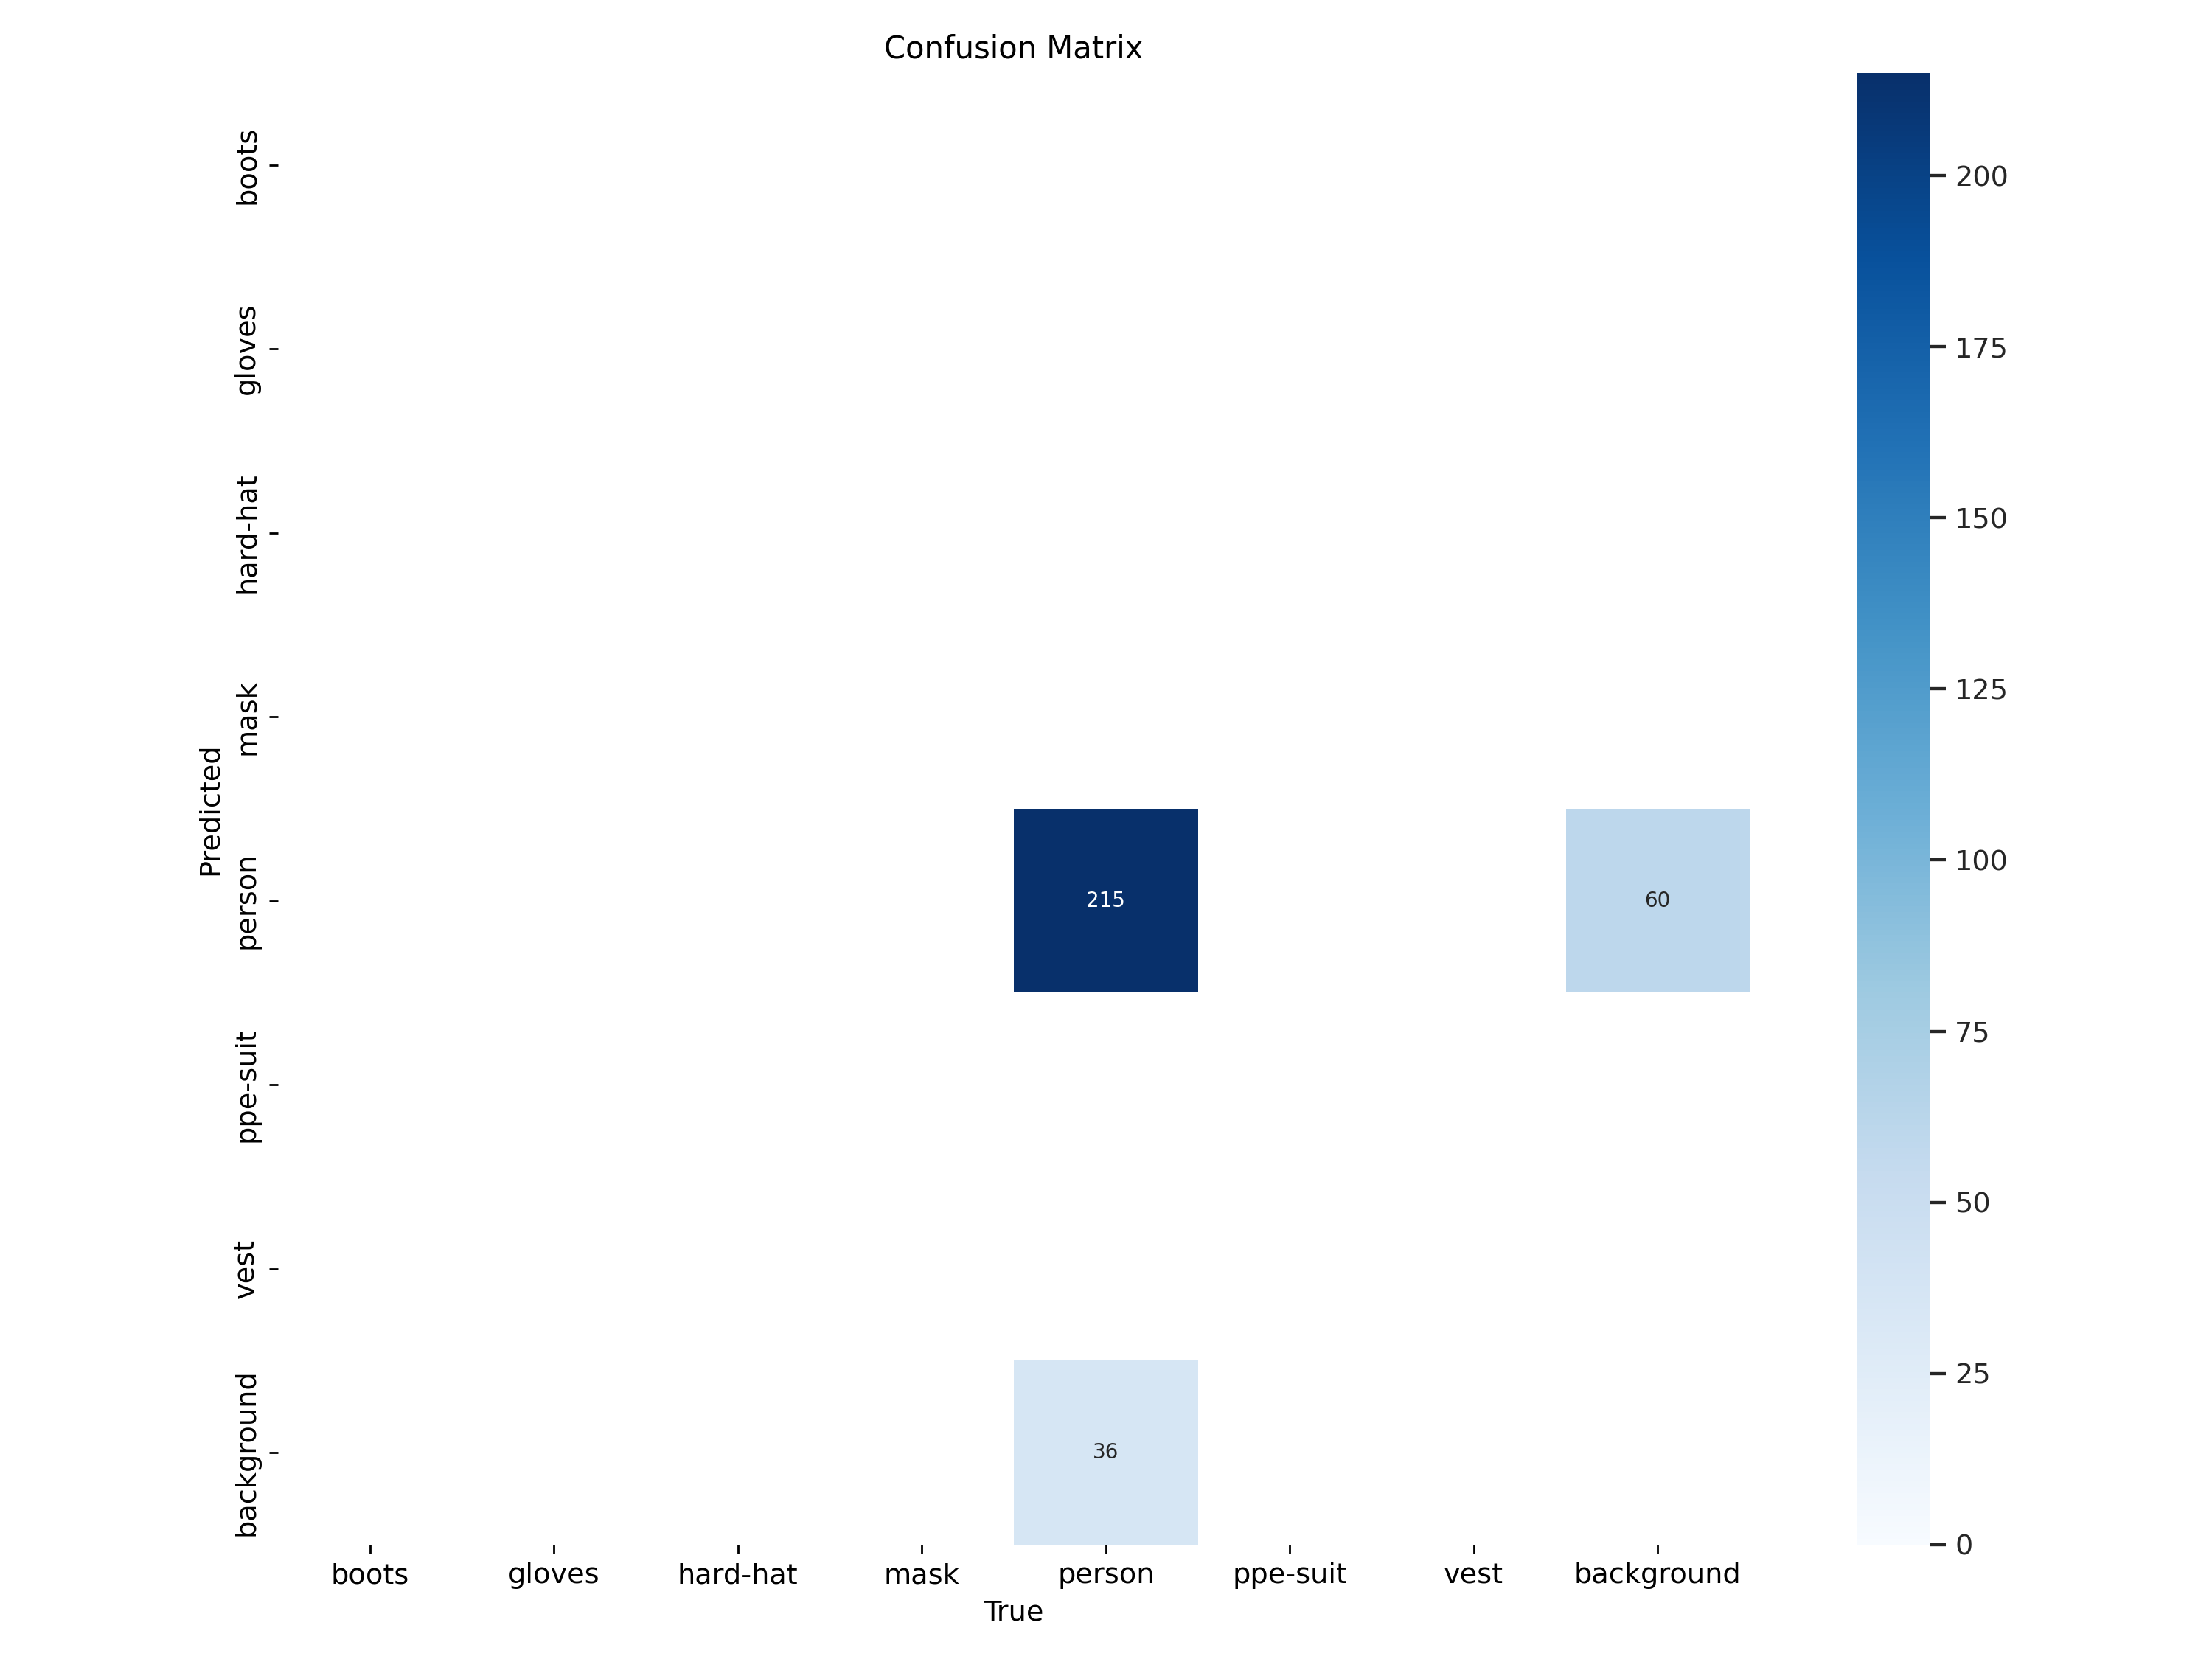

In [ ]:
%cd {HOME}
from IPython.display import Image # Import the Image class from IPython.display
# Updated file path, removed the extra {HOME} from the beginning
Image(filename=f'runs/detect/train5/confusion_matrix.png', width=600)

/content/drive/MyDrive/Yolo_Detection


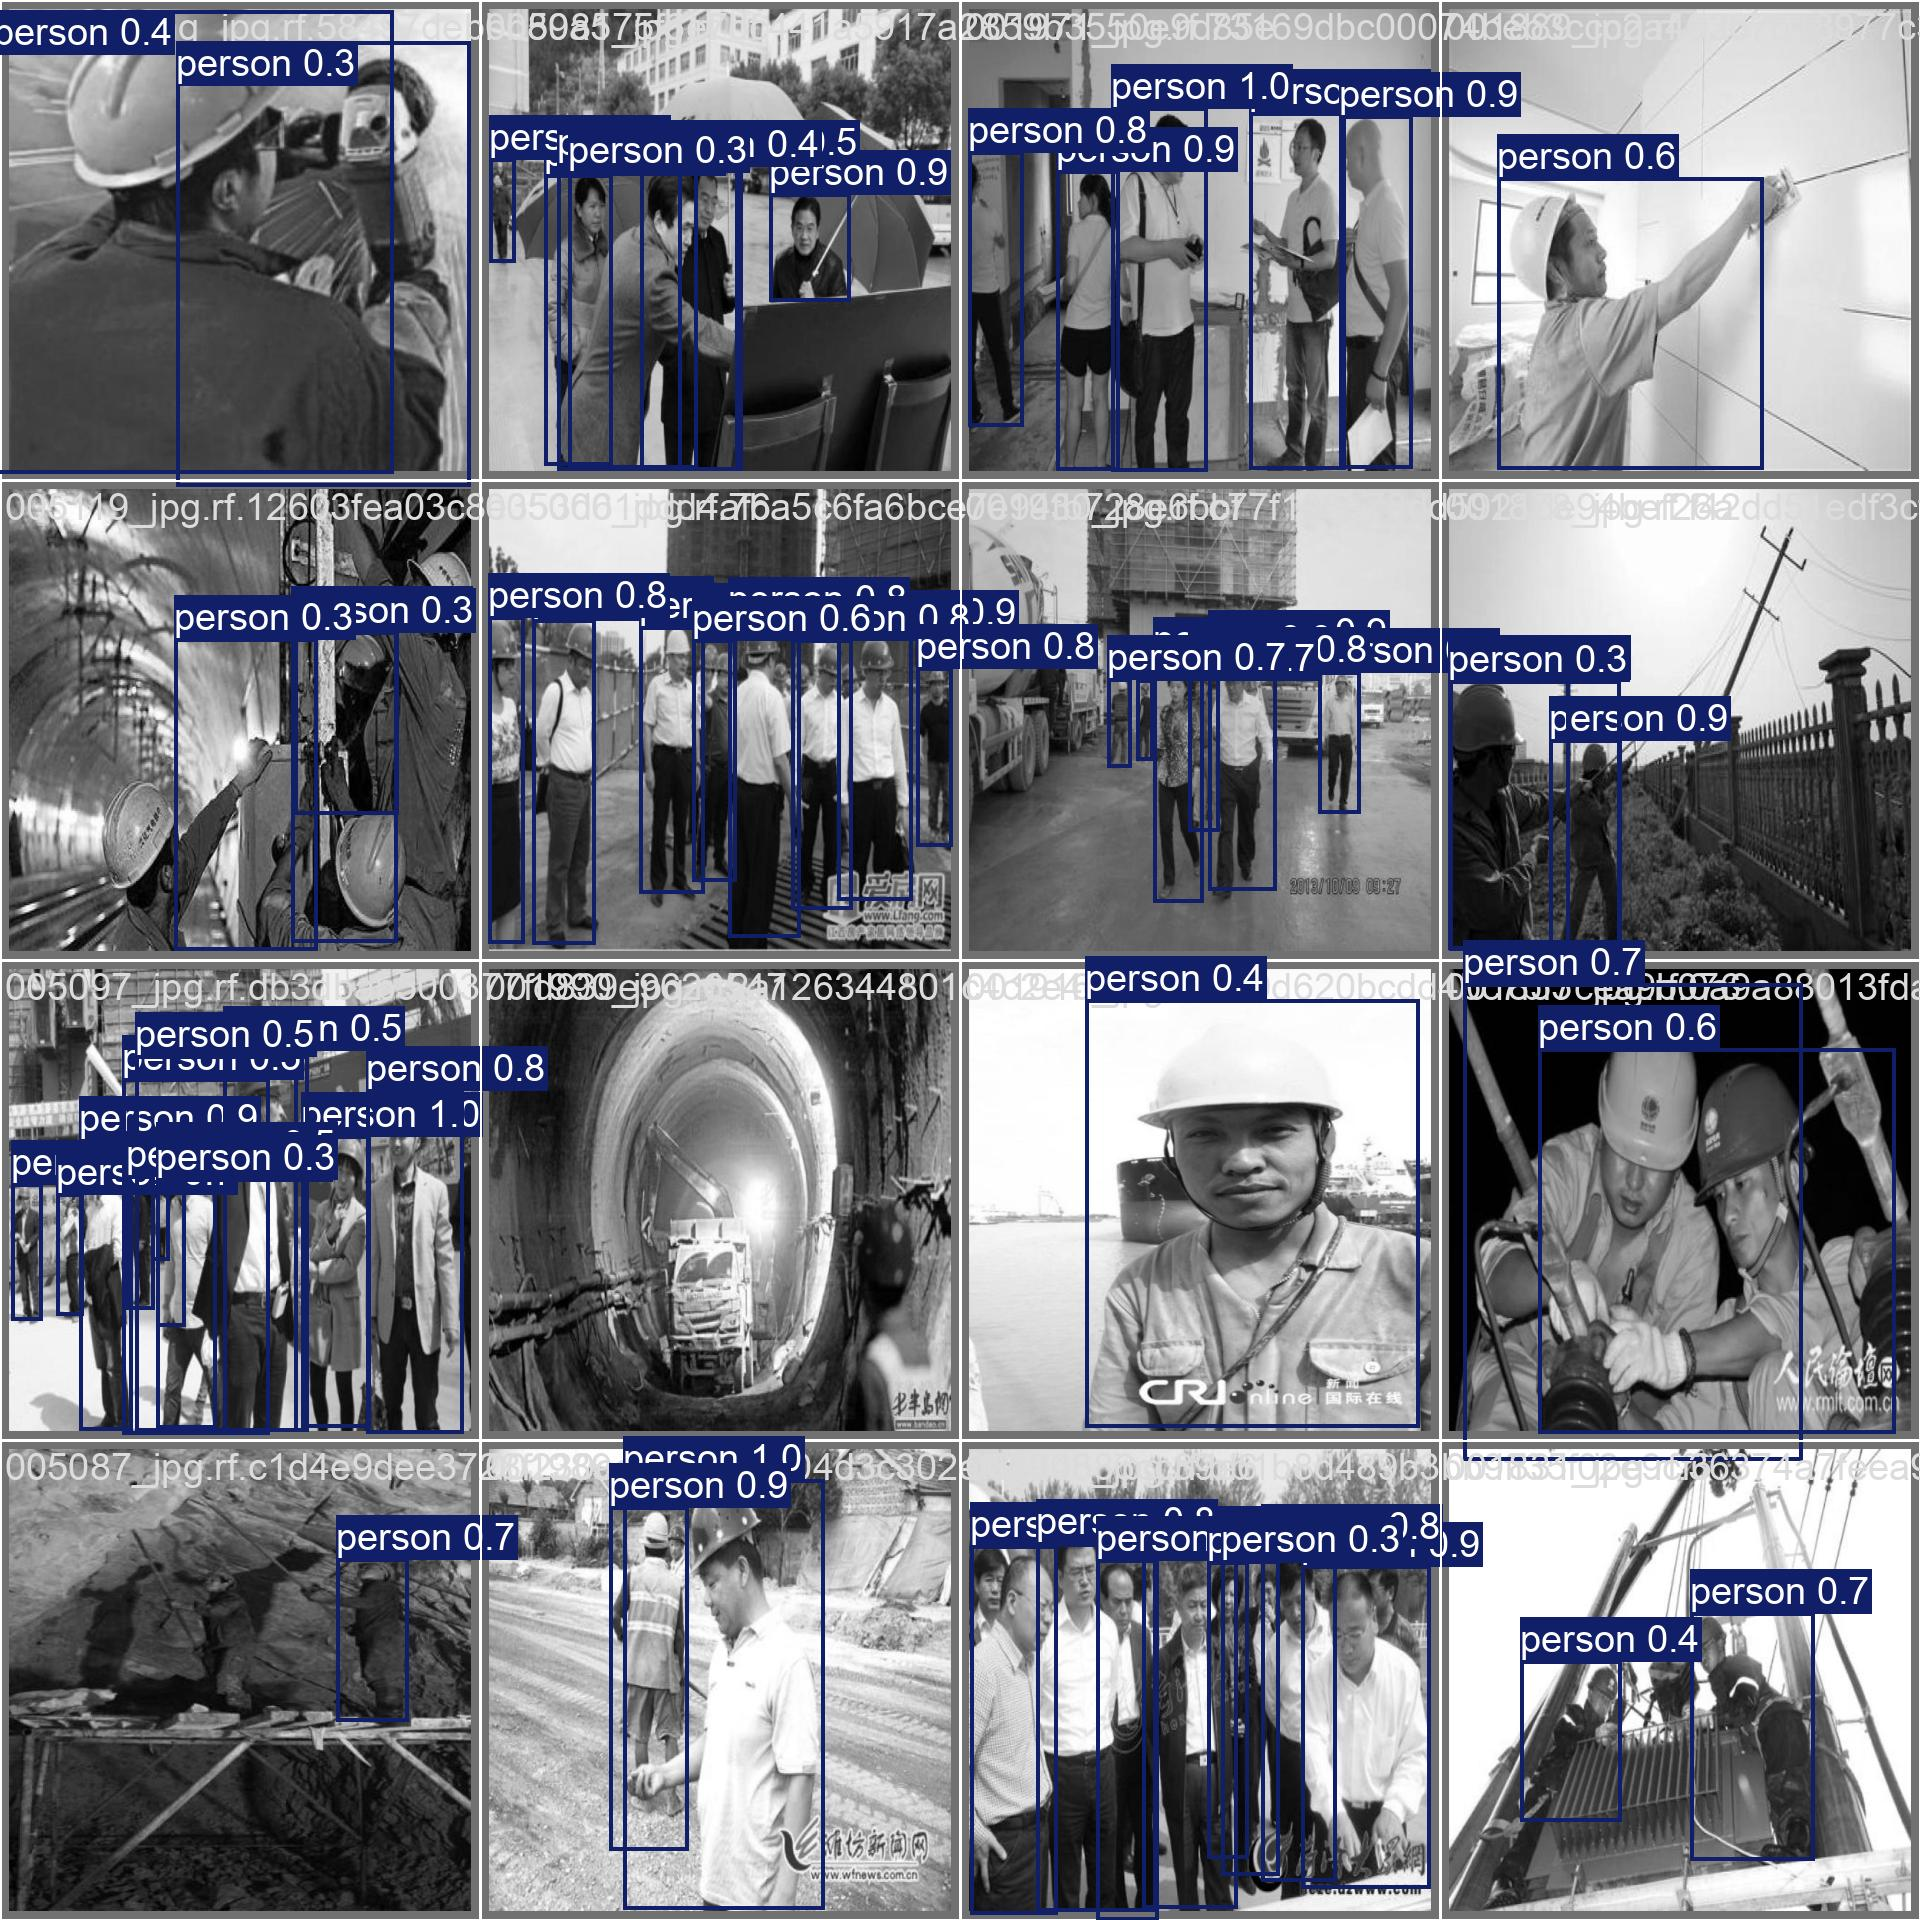

In [ ]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

/content/drive/MyDrive/Yolo_Detection


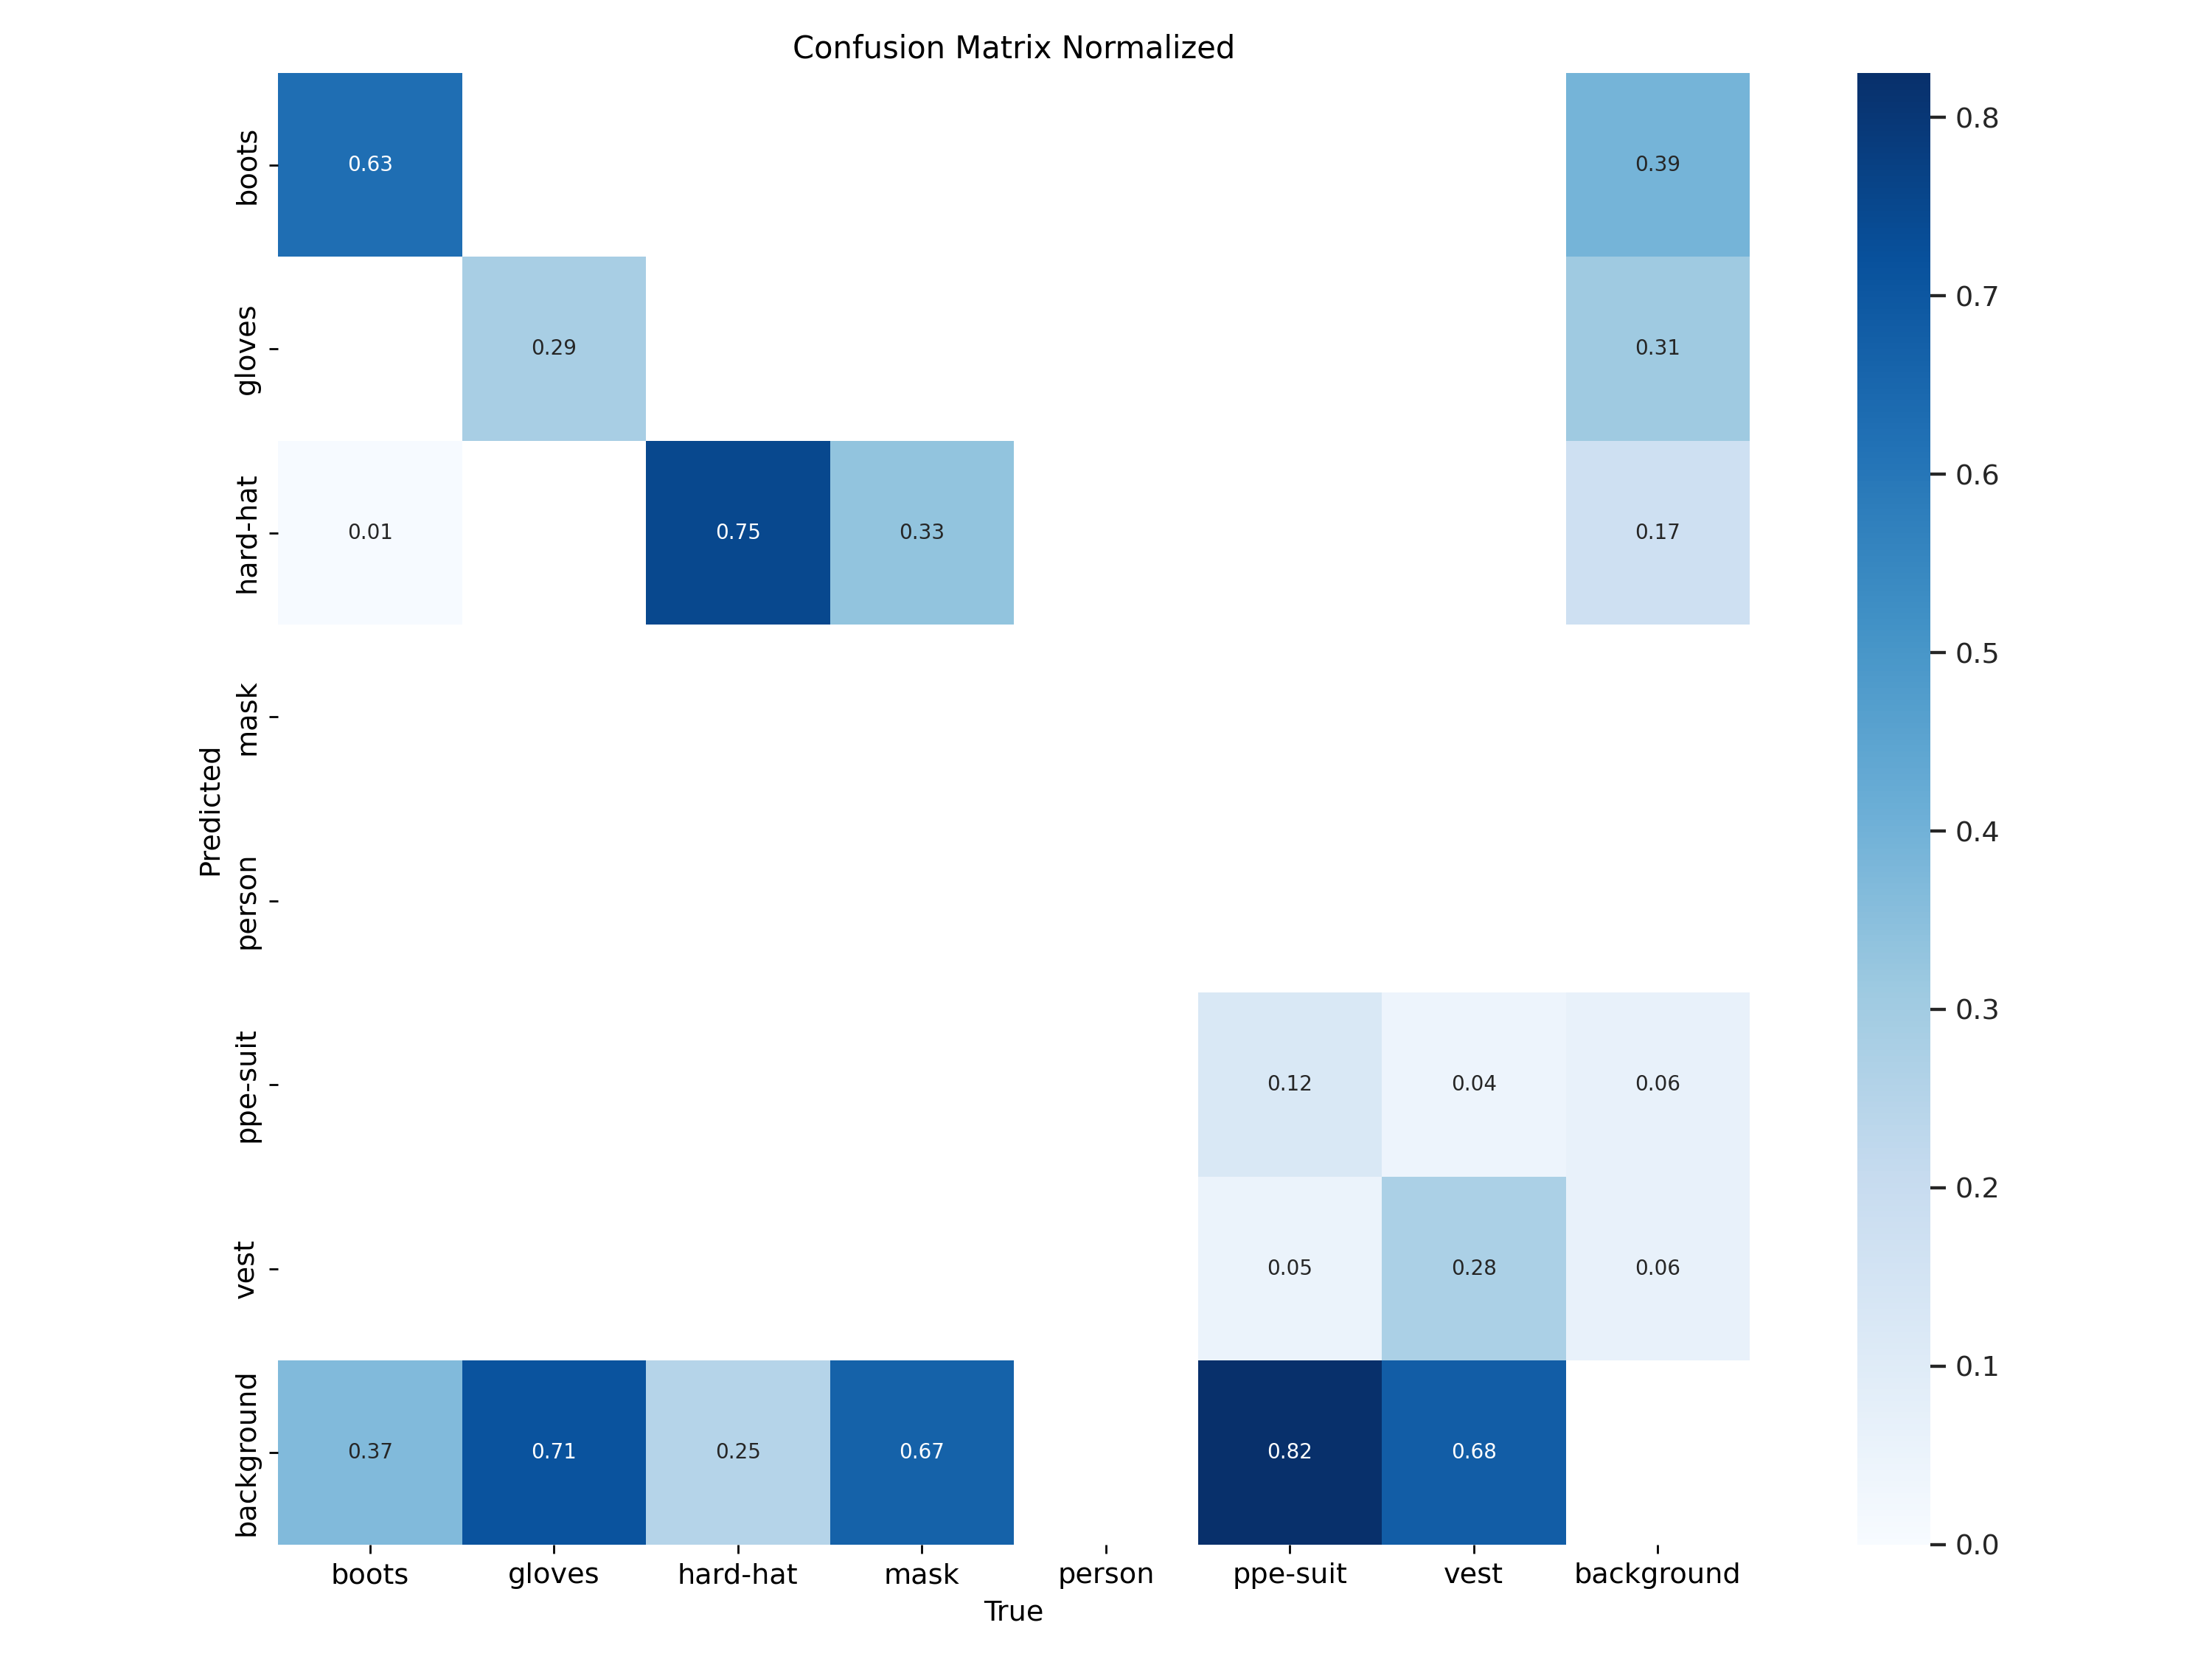

In [ ]:
%cd {HOME}
from IPython.display import Image # Import the Image class from IPython.display
# Updated file path, removed the extra {HOME} from the beginning
Image(filename=f'runs/detect/train7/confusion_matrix_normalized.png', width=600)

/content/drive/MyDrive/Yolo_Detection


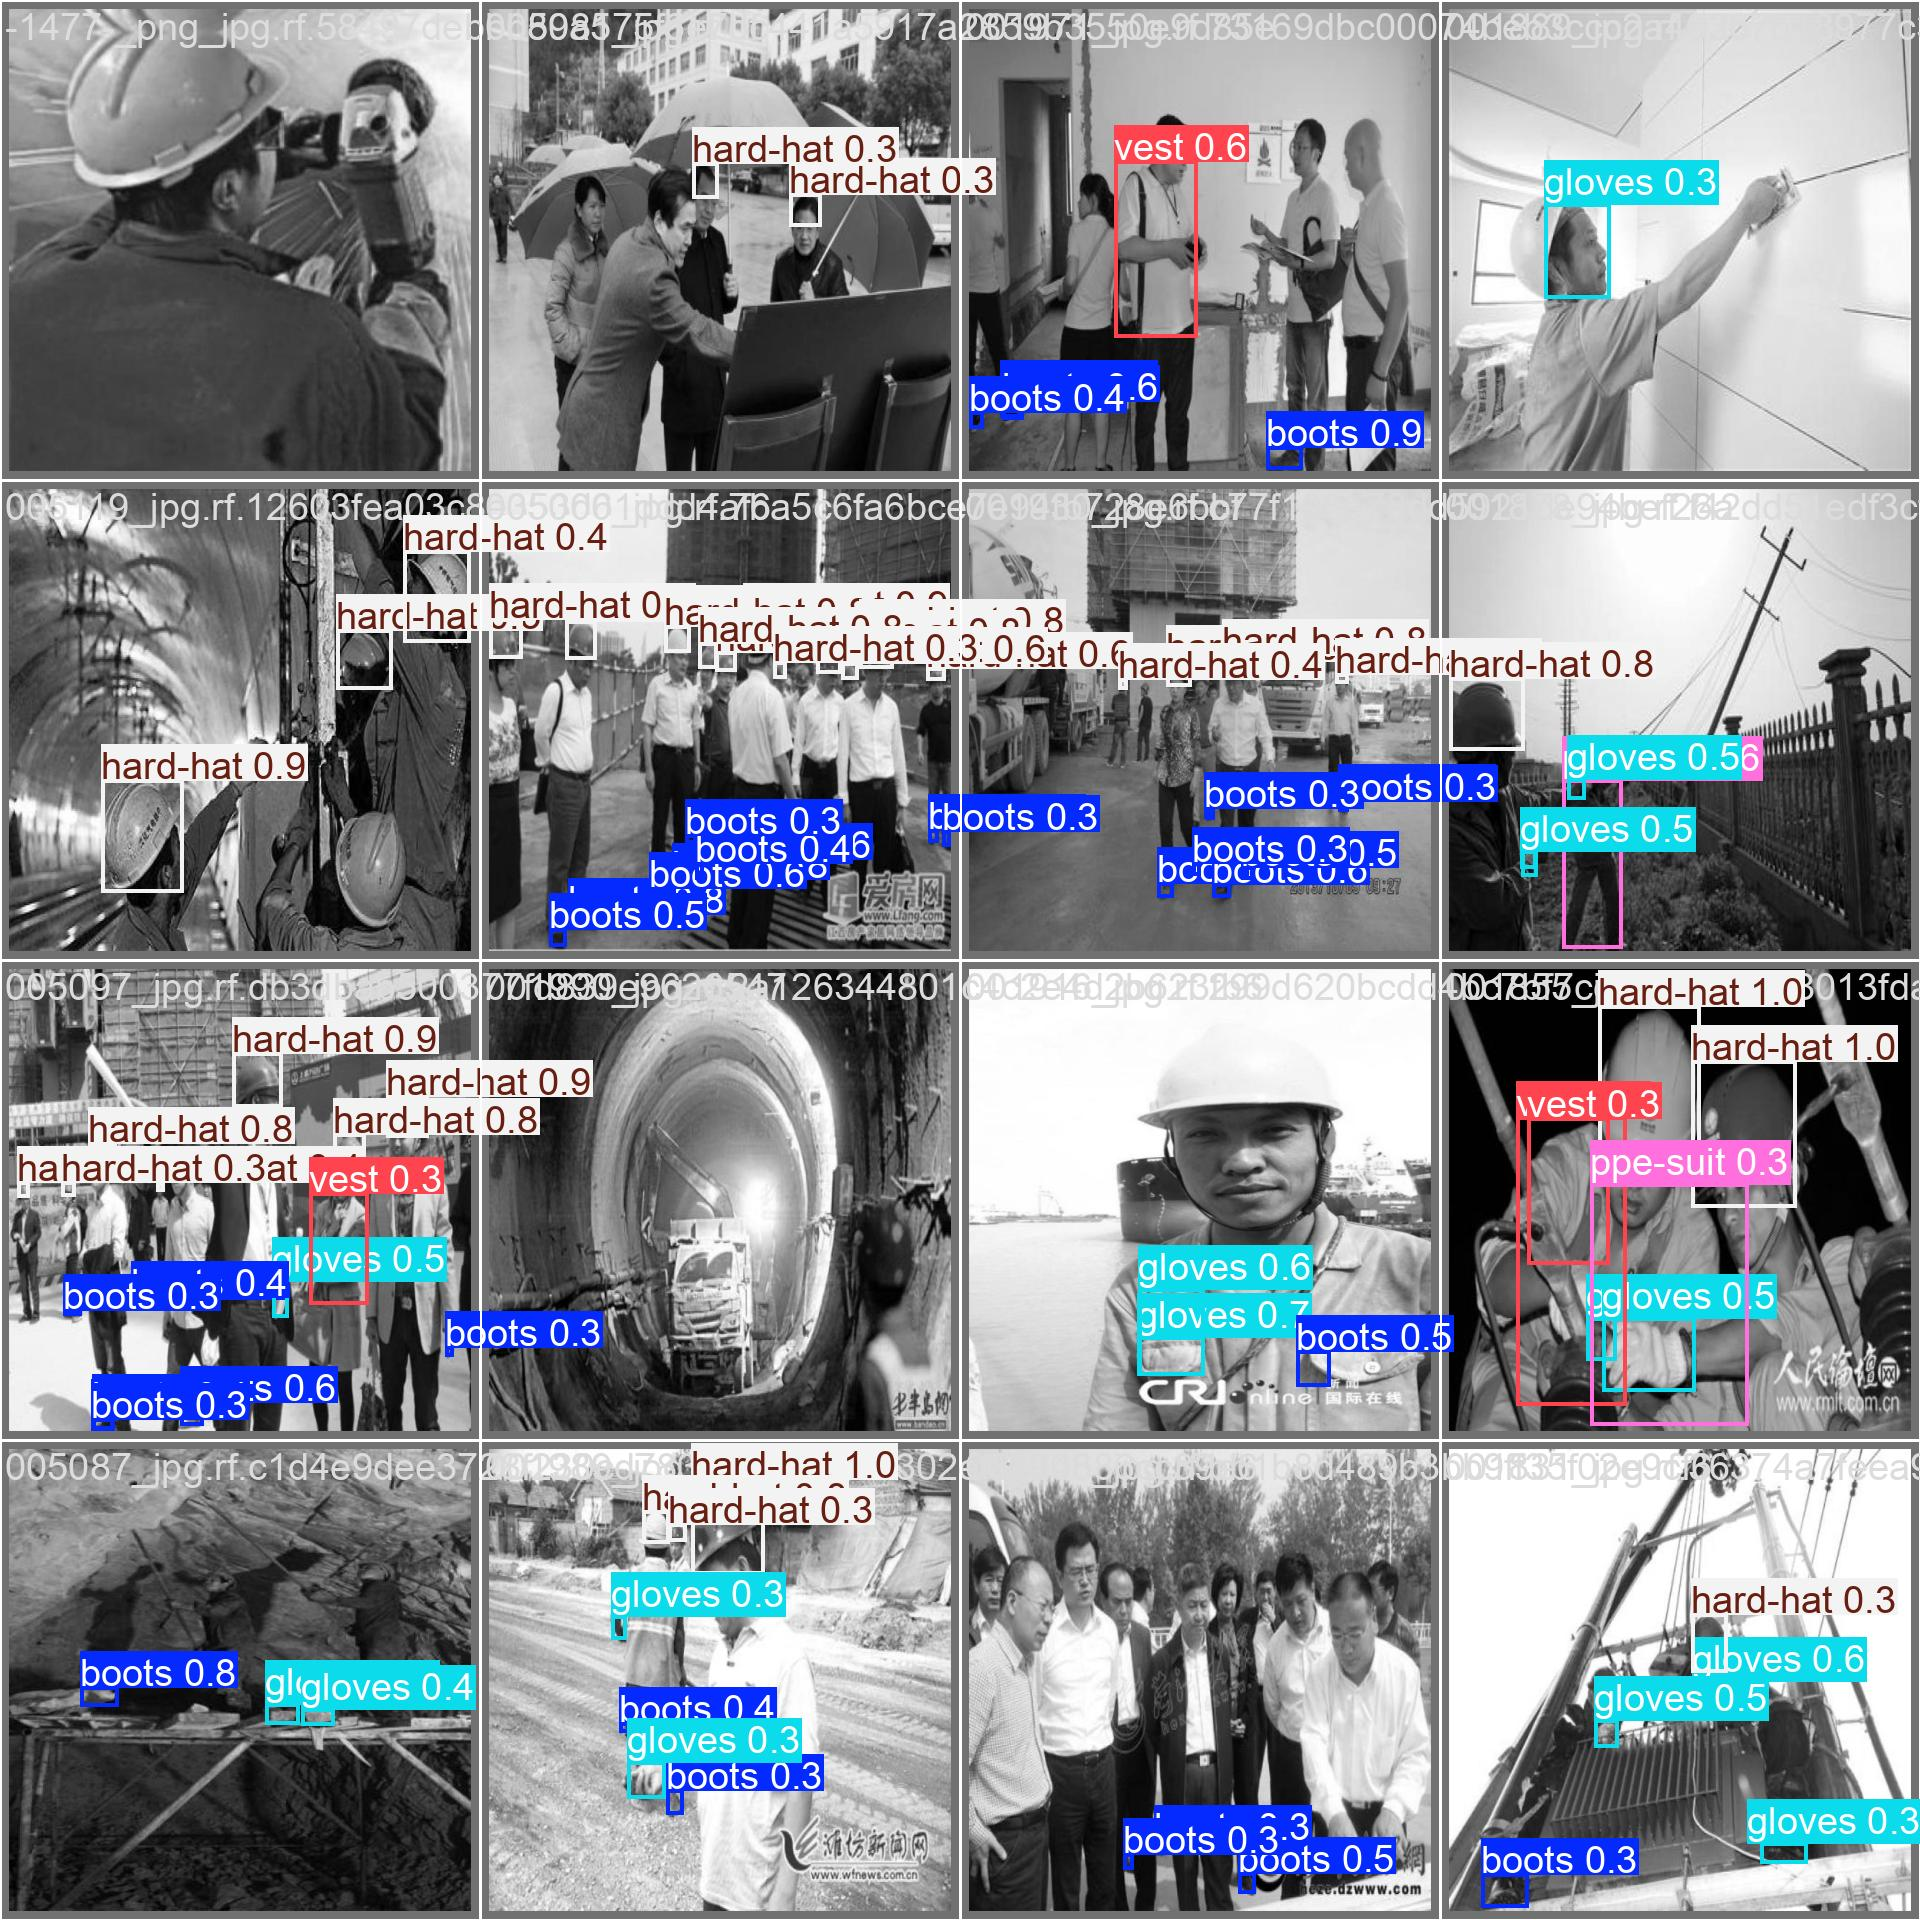

In [ ]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/Yolo_Detection
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo_Detection/PersonDetection-1/valid/labels.cache... 83 images, 6 backgrounds, 0 corrupt: 100% 83/83 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:03<00:00,  1.55it/s]
                   all         83        547      0.558      0.347      0.348       0.19
                 boots         46        193      0.523      0.466      0.443      0.179
                gloves         33         84       0.28      0.214      0.176      0.106
              hard-hat         70        180      0.758      0.744      0.799      0.501
                  mask          3          3          1          0          0          0
              ppe-suit         22         40      0.313      0.275       0

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt



In [ ]:
# Define model path
model_path = "/content/drive/MyDrive/Yolo_Detection/runs/detect/train7/weights/best.pt"




In [ ]:
!ls -lh /content/drive/MyDrive/Yolo_Detection/runs/detect/train5/weights/best.pt


-rw------- 1 root root 6.0M Mar 15 18:27 /content/drive/MyDrive/Yolo_Detection/runs/detect/train5/weights/best.pt


In [ ]:
import torch



In [ ]:

import torch

model_path = "/content/drive/MyDrive/Yolo_Detection/runs/detect/train5/weights/best.pt"

# Load the model on GPU
model_data = torch.load(model_path, map_location="cuda")
print(model_data.keys())  # Check if it's a valid YOLO model


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL torch.nn.modules.container.Sequential was not an allowed global by default. Please use `torch.serialization.add_safe_globals([Sequential])` or the `torch.serialization.safe_globals([Sequential])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.